In [ ]:
!pip -q install rasterio

In [ ]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import numpy as np

In [ ]:
# Open the image 
embu_raster = rio.open("/content/drive/My Drive/Omdena/EMBU.tif")

print(embu_raster.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 4521, 'height': 4984, 'count': 13, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 37.30865071699514,
       0.0, -8.983152841195215e-05, -0.1524441037150828)}


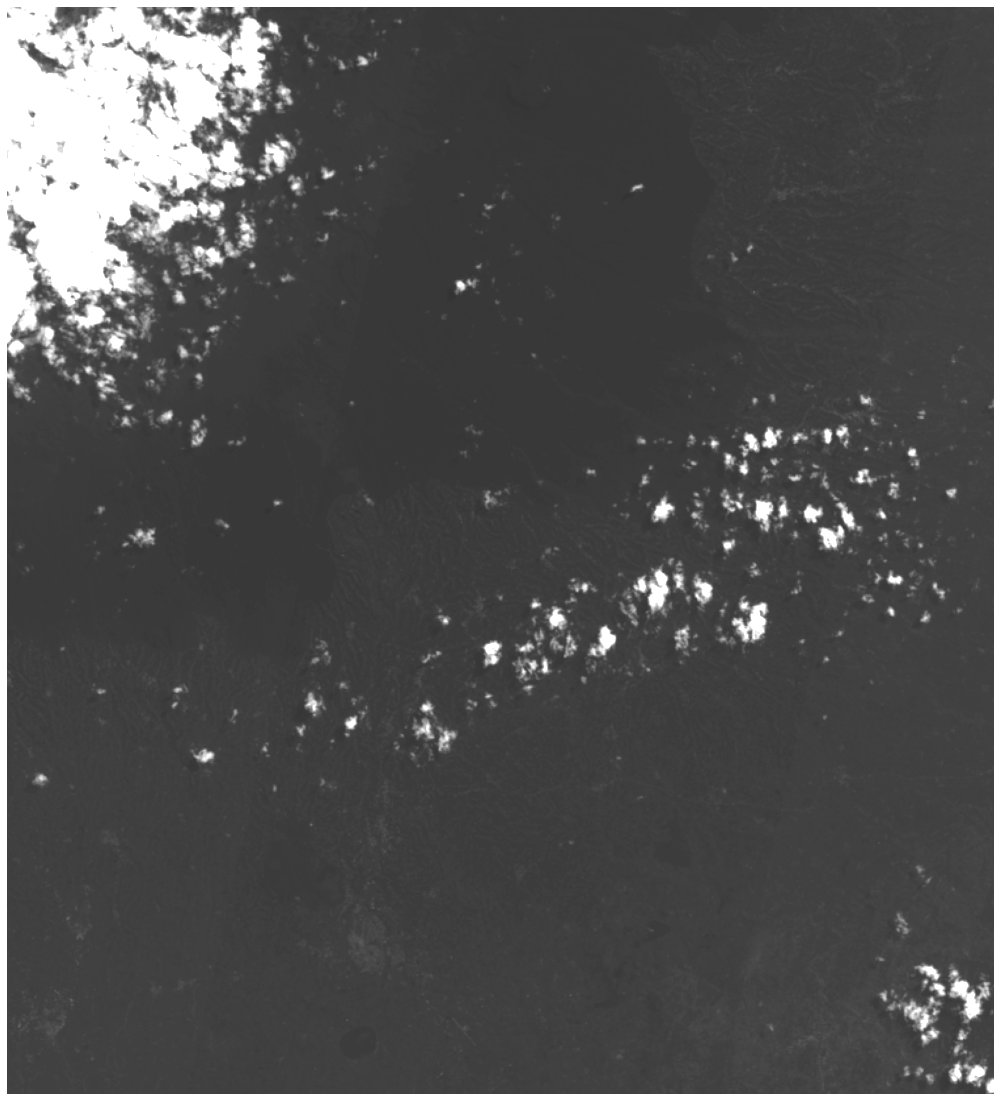

In [ ]:
# Read, enhance and show the image
embu_arr = embu_raster.read()
vmin, vmax = np.nanpercentile(embu_arr, (5,95))  # 5-95% contrast stretch

fig, ax = plt.subplots(figsize=[20,20], ncols=1,nrows=1)
show(embu_raster, cmap='gray', vmin=vmin, vmax=vmax, ax=ax)
ax.set_axis_off()
fig.savefig("embu.jpg", bbox_inches='tight')
plt.show()

In [ ]:
embu_arr.shape

(13, 4984, 4521)

In [ ]:
# create an empty array with same dimension and data type
imgxyb = np.empty((embu_raster.height, embu_raster.width, embu_raster.count), embu_raster.meta['dtype'])

In [ ]:
imgxyb.shape

(4984, 4521, 13)

In [ ]:
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = embu_raster.read(band+1)

In [ ]:
imgxyb.shape

(4984, 4521, 13)

In [ ]:
# convert to 1d array
img1d = imgxyb.reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))

In [ ]:
img1d.shape

(22532664, 13)

In [ ]:
cl = cluster.KMeans(n_clusters = 8)
param = cl.fit(img1d)

In [ ]:
cl.labels_

array([2, 2, 2, ..., 6, 6, 6], dtype=int32)

In [ ]:
 #get the labels of the classes and reshape it x-y-bands shape order (one band only)
img_cl = cl.labels_
img_cl = img_cl.reshape(imgxyb[:,:,0].shape)

In [ ]:
img_cl.shape

(4984, 4521)

In [ ]:
# Create a custom color map to represent our different 4 classes
cmap = mc.LinearSegmentedColormap.from_list("", ["black","red","green","yellow","white", "blue", 'cyan', 'maroon'])

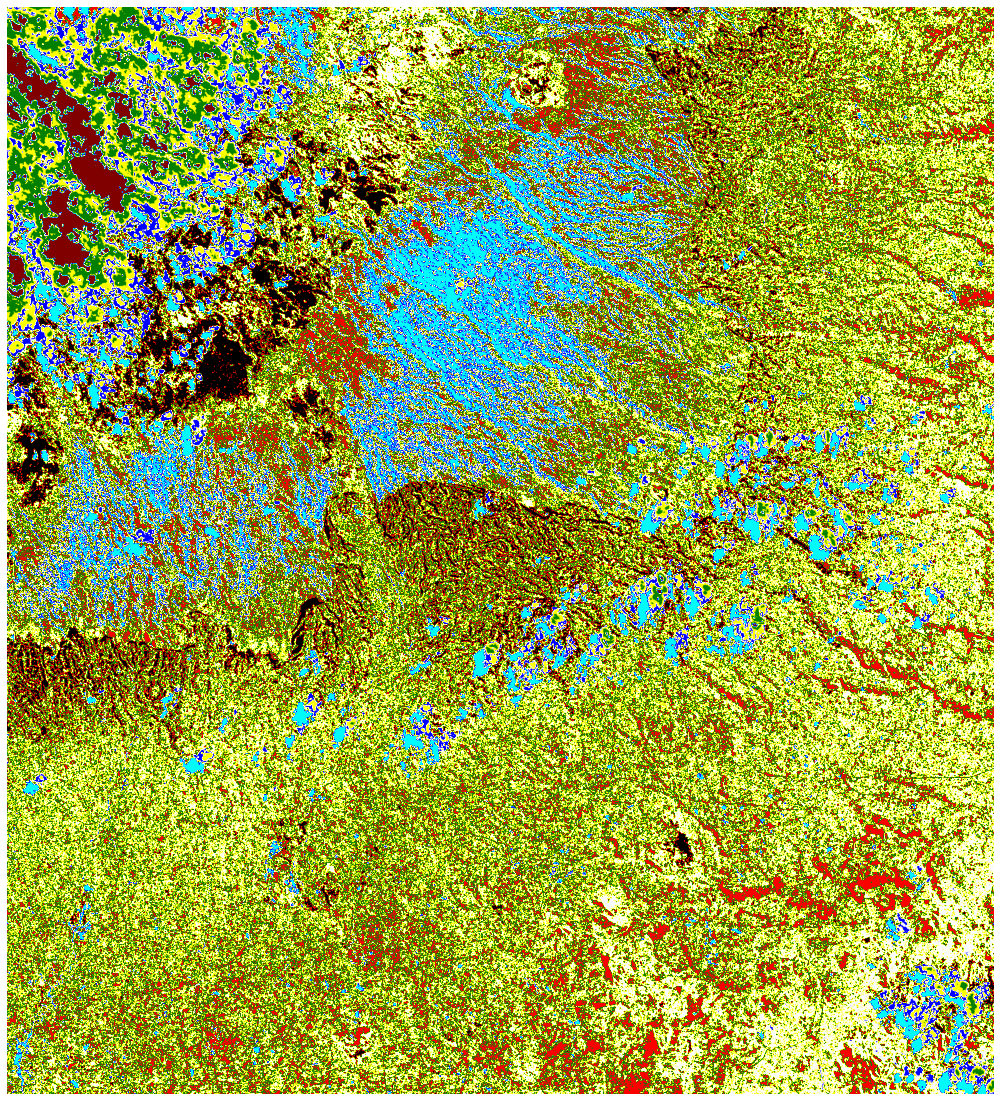

In [ ]:

# Show the resulting array and save it as jpg image
plt.figure(figsize=[20,20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
plt.savefig("embu_clustered.jpg", bbox_inches='tight')
plt.show()

In [ ]:
# open the raster image
tharaka = rio.open('/content/drive/My Drive/Omdena/THARAKA.tif')

In [ ]:
import pickle
pickle.dump(cl, open("model.pkl", "wb"))

In [ ]:
# Read, enhance and show the image
tharaka_arr = tharaka.read()
vmin, vmax = np.nanpercentile(tharaka_arr, (5,95))  # 5-95% contrast stretch

In [ ]:
tharaka.meta

{'count': 13,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 5524,
 'nodata': None,
 'transform': Affine(8.983152841195215e-05, 0.0, 37.79571726404475,
       0.0, -8.983152841195215e-05, 0.06485836351342945),
 'width': 5737}

In [ ]:
# create an empty array with same dimensions and data type 
tharaka_xyb = np.empty((tharaka.height, tharaka.width, tharaka.count), tharaka.meta['dtype'])

In [ ]:
# loop through the raster bands and fill the empty array in x-y-bands order
for band in range(tharaka_xyb.shape[2]):
     tharaka_xyb[:,:,band] = tharaka.read(band+1)

In [ ]:
# convert to 1d array
tharaka_1d = tharaka_xyb.reshape(tharaka_xyb.shape[0]*tharaka_xyb.shape[1], tharaka_xyb.shape[2])

In [ ]:
tharaka_1d.shape

(31691188, 13)

In [ ]:
# predict the clusters in the image 
pred = cl.predict(tharaka_1d)

In [ ]:
# reshape the 1d array predictions to x-y-bands shape order (only one band)
tharaka_cul = pred
tharaka_cul = tharaka_cul.reshape(tharaka_xyb[:,:,0].shape)

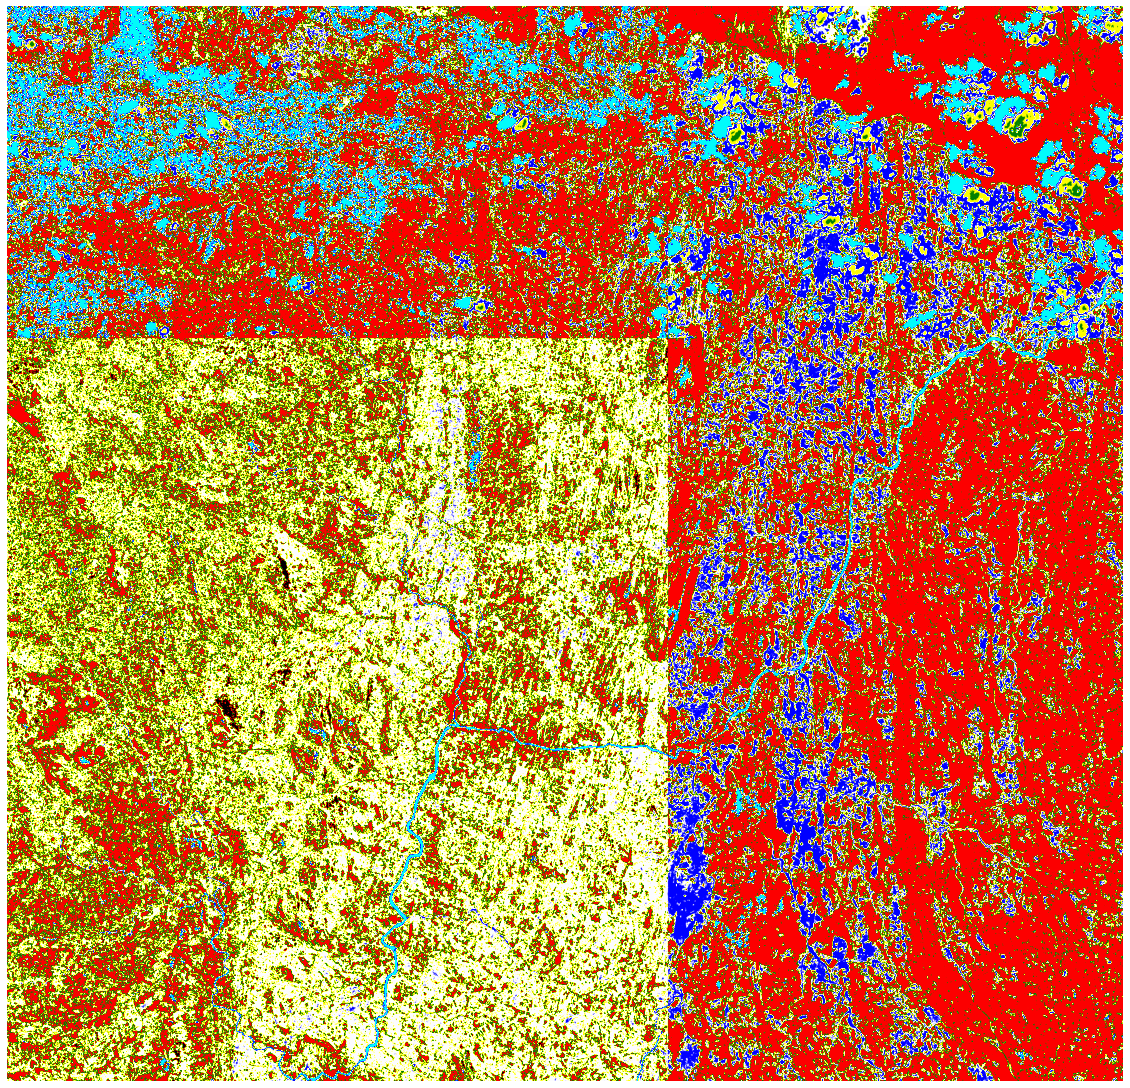

In [ ]:
# show the predicted results
plt.figure(figsize=[20,20])
plt.imshow(tharaka_cul, cmap=cmap)
plt.axis('off')
plt.savefig("tharaka_cul.jpg", bbox_inches='tight')
plt.show()

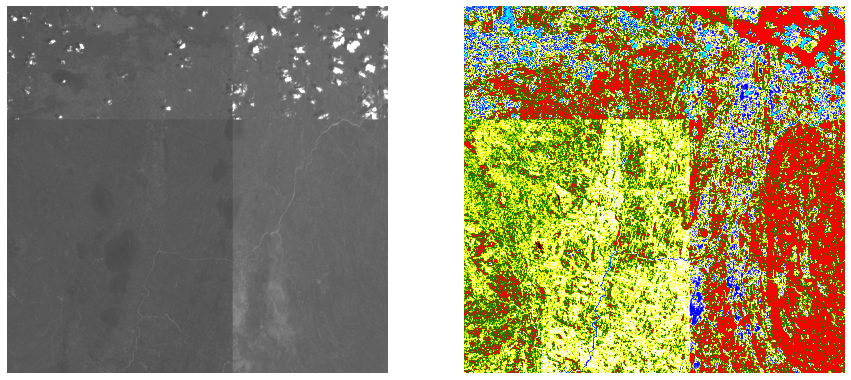

In [ ]:

# show the original and predicted image
fig, (ax1,ax2) = plt.subplots(figsize=[15,15], nrows=1,ncols=2, sharey=False,)
show(tharaka, cmap='gray', vmin=vmin, vmax=vmax, ax=ax1)
show(tharaka_cul, cmap=cmap, ax=ax2)
ax1.set_axis_off()
ax2.set_axis_off()
fig.savefig("pred.png", bbox_inches='tight')
plt.show()